![Sales Analysis](https://assets.website-files.com/60e7f71b22c6d0b9cf329ceb/621e193892e8c41051e34fce_StepsforEffectivelyAnalyzingYourSalesData_20971e108bda1d8795a0c640c000e691_2000.png)

# Dataset Information:

The dataset appears to contain information related to sales orders. Below are the columns in the dataset and a brief description of each:

* Order ID: A unique identifier for each order.
* Product: The name or description of the product sold.
* Quantity Ordered: The quantity of the product ordered in each transaction.
* Price Each: The unit price of the product.
* Order Date: The date and time when the order was placed.
* Purchase Address: The address where the purchase was made, including the city, state, and postal code.



Key Points:

* The dataset likely represents e-commerce or retail sales data.
* Each row corresponds to a single sales transaction.
* The "Order ID" column serves as a unique identifier for each order.
* The "Product" column provides information about the type of product sold.
* The "Quantity Ordered" column indicates how many units of the product were ordered in each transaction.
* The "Price Each" column represents the unit price of the product.
* The "Order Date" column contains the date and time of each order.
* The "Purchase Address" column includes the location where the purchase occurred, 
* including the city, state, and postal code.
* This dataset could be used for various types of analysis, such as sales forecasting,product performance analysis, and customer segmentation, depending on the specific goals of the analysis. Additionally, it can be visualized and explored to extract valuable insights about the sales patterns and trends.

# Summary

**1. Libraries and Environment Setup**

* Import necessary libraries such as pandas, numpy, os, matplotlib, seaborn, datetime, and warnings.
* Set up the environment for data analysis.

**2. File Handling**

* Read CSV files from the "/kaggle/input/sales-data" directory.
* Concatenate these files into a single DataFrame named all_data.
* Save the concatenated data to a CSV file named "sales_data.csv."

**3. Data Loading**

* Read the "sales_data.csv" file into a DataFrame named df.
* Remove duplicate rows from the DataFrame.
* Analyze missing values by calculating their counts and percentages.

**4. Missing Data Analysis**

* Create a horizontal bar plot to visualize the percentage of missing values in each column.

**5. Data Cleaning** 

* Remove rows with missing values from the DataFrame.
* Remove rows with abnormal values in the "Order Date" column (those starting with 'Or').
* Convert the "Order Date" column to datetime format and extract the "Month" and "Hour" information as new columns.

**6. City Data Extraction**

* Extract city information from the "Purchase Address" column and create a new column named "City."

**7. Data Analysis and Visualization**

* Monthly sales: Analyze and plot total sales count by month.
* City-based sales: Analyze and plot total sales count by city.
* City-based total sales: Analyze and plot total sales amount by city.
* Hourly sales: Analyze and plot total sales count by hour of the day.
* Hourly total sales: Analyze and plot total sales amount by hour of the day.
* The code divides the data analysis task into several steps, each with detailed explanations. These kinds of scripts are useful for improving data analysis skills and can be customized for different datasets.

> # 1. Libraries and Environment Setup

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


> # 2. File Handling

In [2]:
files = [file for file in os.listdir("/kaggle/input/sales-data")]
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("/kaggle/input/sales-data/"+file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv("sales_data.csv", index=False)

> # 3. Data Loading

In [3]:
df = pd.read_csv("sales_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


> # 4. Duplicates and Missing Values

In [4]:
df.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


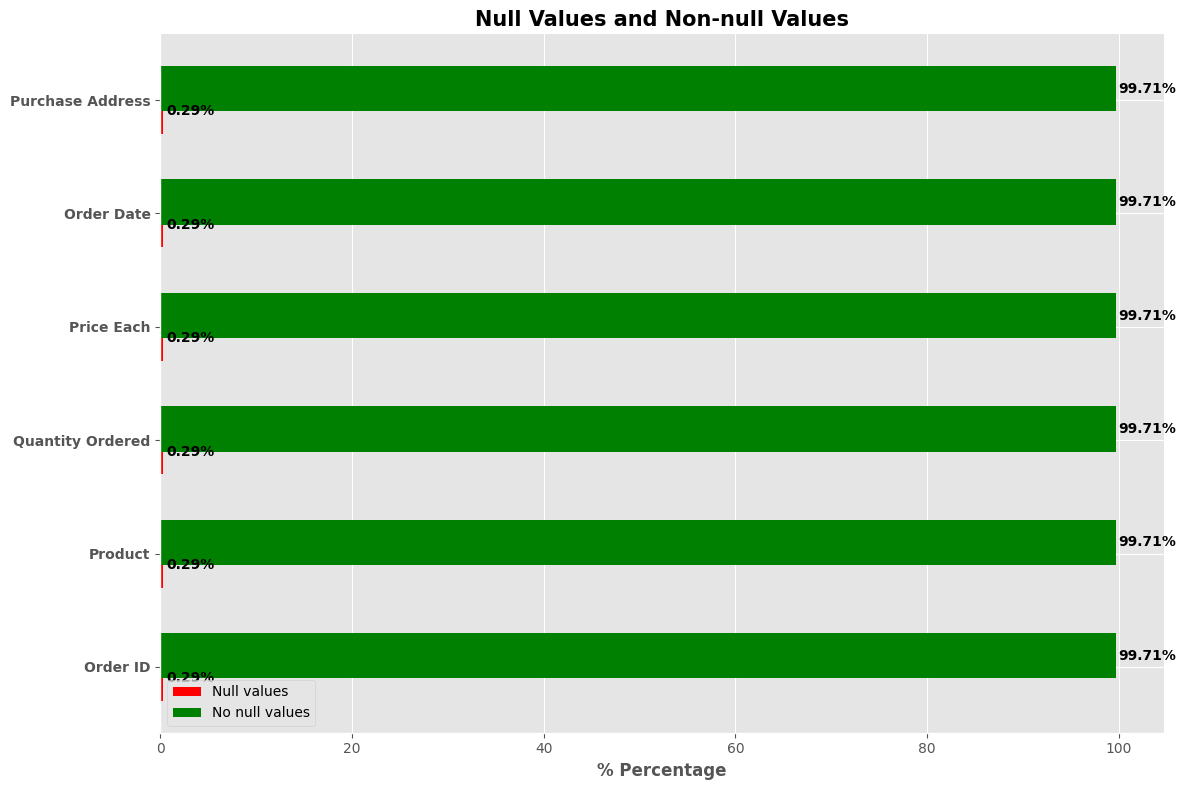

In [5]:
df_null_values = df.isnull().sum().to_frame().rename(columns={0: 'Count'})
df_null_values['Percentage_nulls'] = (df_null_values['Count'] / len(df)) * 100
df_null_values['Percentage_no_nulls'] = 100 - df_null_values['Percentage_nulls']

n = len(df_null_values.index)
x = np.arange(n)

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.4
gap = 0.2

rects1 = ax.barh(x - gap / 2, df_null_values['Percentage_nulls'], bar_width, label='Null values', color='red')
rects2 = ax.barh(x + gap / 2, df_null_values['Percentage_no_nulls'], bar_width, label='No null values', color='green')

ax.set_title('Null Values and Non-null Values', fontsize=15, fontweight='bold')
ax.set_xlabel('% Percentage', fontsize=12, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(df_null_values.index, fontsize=10, fontweight='bold') 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}%',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(2, 0),
                    textcoords="offset points",
                    ha='left', va='center', size=10, weight='bold')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [6]:
df.dropna(inplace=True)

> # 5. Data Cleaning

In [7]:
df = df[df["Order Date"].str[0:2] != 'Or']
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
df['Month'] = df['Month'].astype(np.int32)
df['Hour'] = df['Hour'].astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Hour              185950 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 11.3+ MB


> # 6. Feature Extraction

In [8]:
def extract_city(address):
    city = address.split(',')[1].strip()
    return city

df['City'] = df['Purchase Address'].apply(extract_city)

In [9]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(np.int32)
df['Price Each'] = df['Price Each'].astype(np.float64)

df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Total Sales
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,22,Seattle,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,15,Dallas,99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,14,Portland,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,20,Los Angeles,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,19,New York City,7.68


> # 7. Data Analysis and Visualization

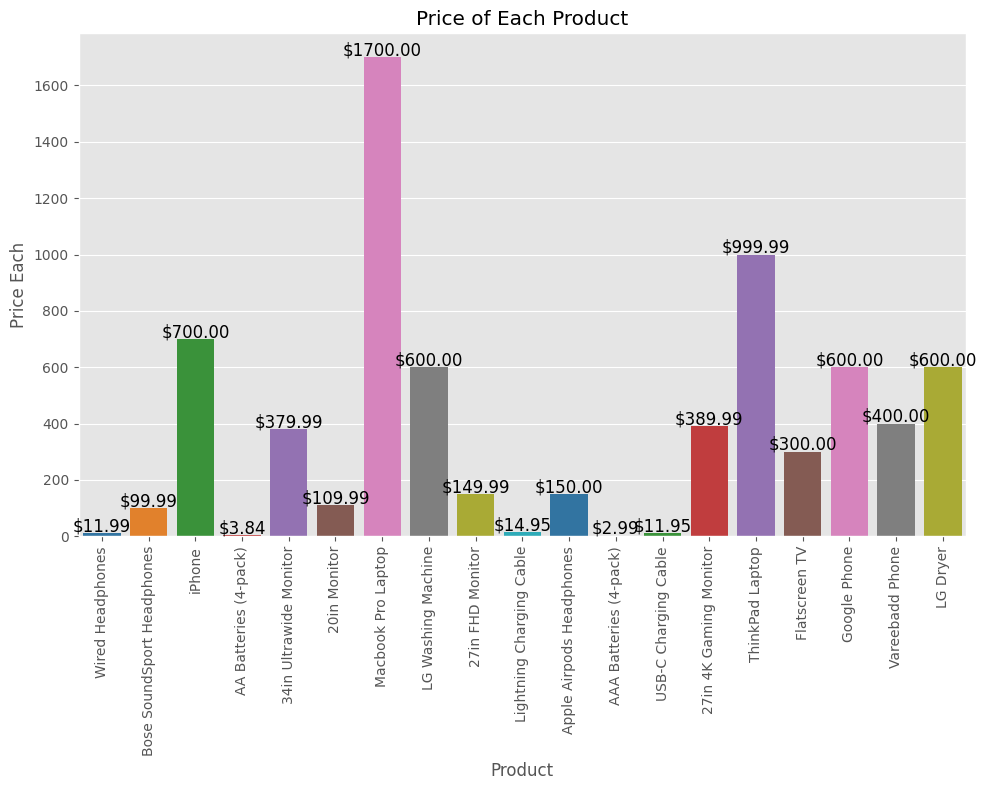

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Product', y='Price Each', data=df, palette="tab10")
plt.xlabel('Product')
plt.ylabel('Price Each')
plt.title('Price of Each Product')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

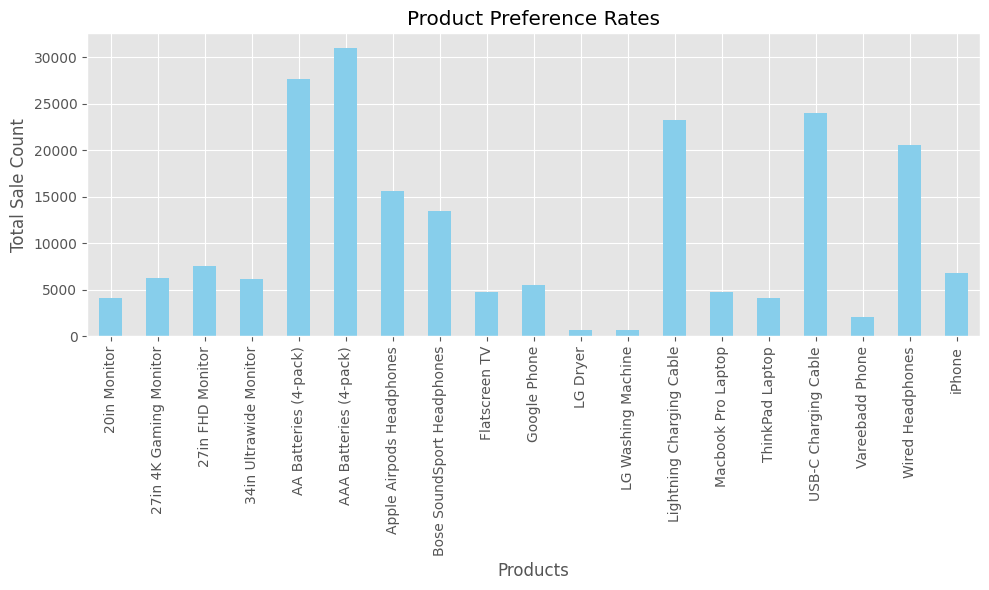

In [11]:
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Product Preference Rates')
plt.xlabel('Products')
plt.ylabel('Total Sale Count')
plt.tight_layout()
plt.show()

In [12]:
product_sales = df.groupby(['Month', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)

product_sales_percentage = product_sales.divide(product_sales.sum(axis=1), axis=0) * 100

fig = px.line(product_sales_percentage, x=product_sales_percentage.index, y=product_sales_percentage.columns,
              title='Percentage Sales Ratios of Products by Month',
              color_discrete_sequence=px.colors.qualitative.Bold,
              line_dash_sequence=['solid', 'dot', 'dash', 'longdash'],   
              line_dash='Product'
              )

fig.update_traces(mode='lines+markers')
fig.update_layout(
    yaxis=dict(
        title='(%)',
        range=[0, 17] 
    )
)

fig.show()

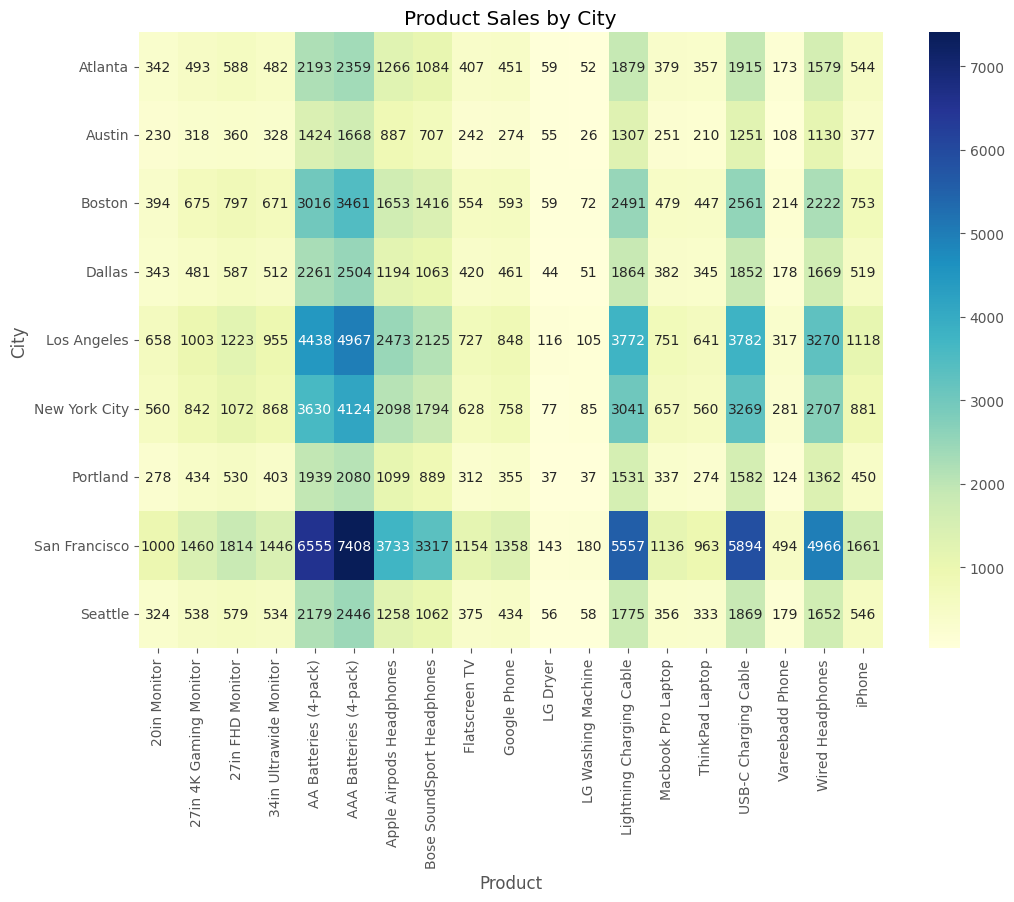

In [13]:
city_product_sales = df.groupby(['City', 'Product'])['Quantity Ordered'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(city_product_sales, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Product Sales by City')
plt.xlabel('Product')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.show()

In [14]:
city_sales = df.groupby(['Month', 'City'])['Total Sales'].sum().unstack().fillna(0)

city_sales_percentage = city_sales.divide(city_sales.sum(axis=1), axis=0) * 100

fig = px.line(city_sales_percentage, x=city_sales_percentage.index, y=city_sales_percentage.columns,
              title='Percentage Sales Ratios of Cities by Month',
              color_discrete_sequence=px.colors.qualitative.D3,
              line_dash_sequence=['solid', 'dot', 'dash', 'longdash'],
              line_dash='City'
              )

fig.update_traces(mode='lines+markers')
fig.update_layout(
    yaxis=dict(
        title='(%)',
        range=[0, 25]
    )
)

fig.show()

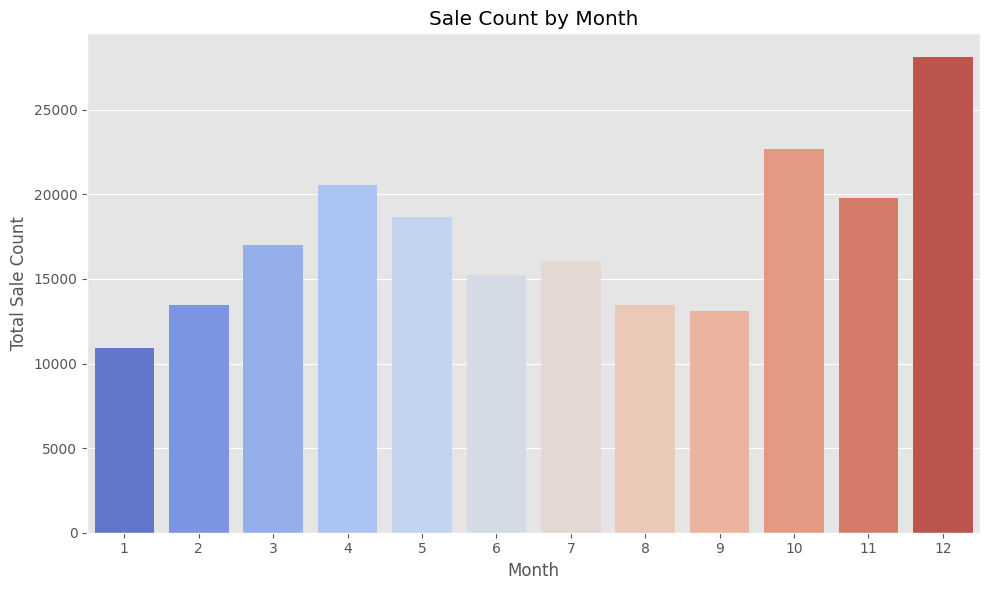

In [15]:
monthly_sales = df.groupby('Month')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales['Month'], y=monthly_sales['Quantity Ordered'], palette="coolwarm")
plt.xlabel('Month')
plt.ylabel('Total Sale Count')
plt.title('Sale Count by Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

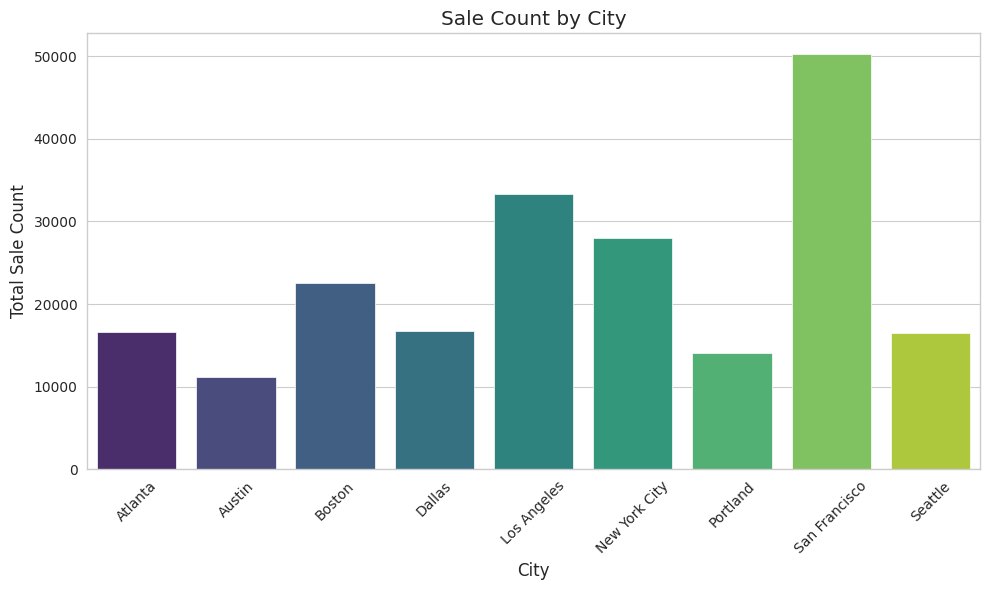

In [16]:
city_sale_count = df.groupby('City')['Quantity Ordered'].sum().reset_index()

sns.set_palette("husl")
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=city_sale_count['City'], y=city_sale_count['Quantity Ordered'], palette="viridis")
plt.xlabel('City')
plt.ylabel('Total Sale Count')
plt.title('Sale Count by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

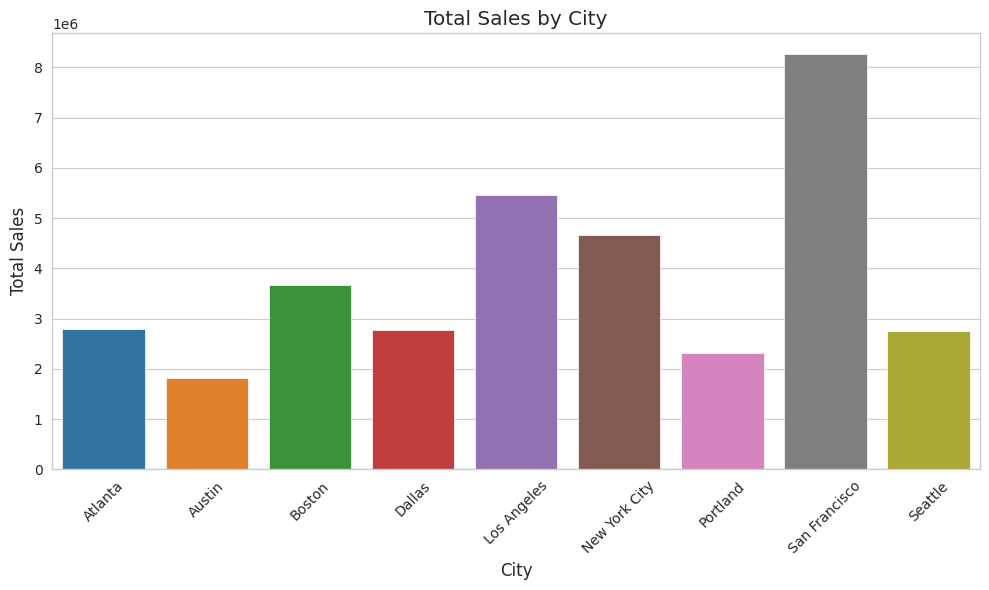

In [17]:
city_total_sales = df.groupby('City')['Total Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_total_sales['City'], y=city_total_sales['Total Sales'], palette="tab10")
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
hourly_sale_count = df.groupby('Hour')['Quantity Ordered'].sum().reset_index()

fig = px.line(hourly_sale_count, x='Hour', y='Quantity Ordered',
              title='Sale Count by Hour',
              labels={'Hour': 'Hour', 'Quantity Ordered': 'Total Sale Count'})

fig.update_traces(mode='lines+markers')
fig.show()

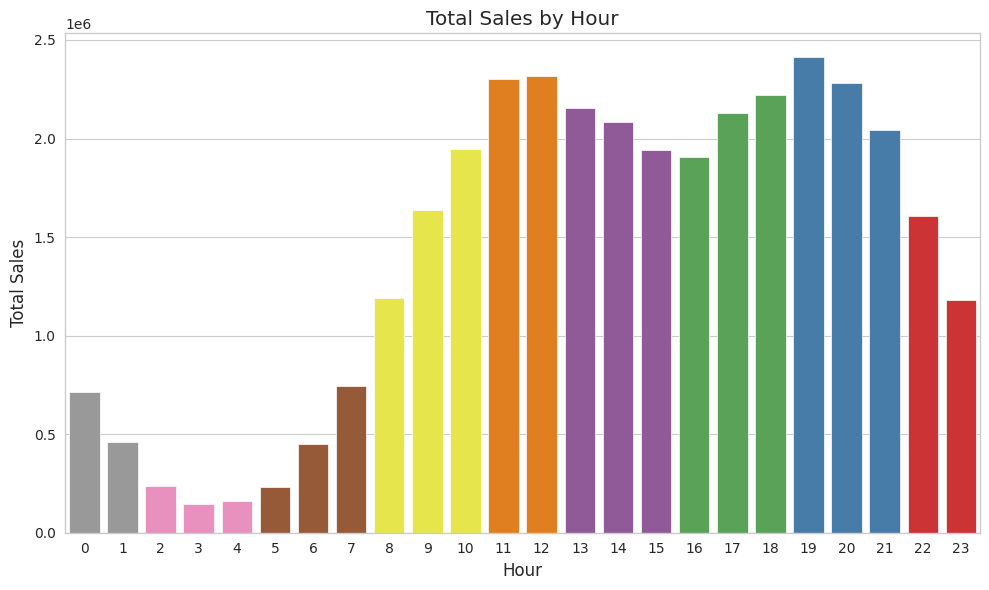

In [19]:
hourly_total_sales = df.groupby('Hour')['Total Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_total_sales['Hour'], y=hourly_total_sales['Total Sales'], palette="Set1_r")
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()